# Домашняя работа 5: АБ-тестирование

## Задача 1: Сравнение методов анализа конверсии (30 баллов)
**Данные:**  
- Группа A: 15,000 пользователей, 750 конверсий  
- Группа B: 17,000 пользователей, 940 конверсий

```python
# Данные
conversions = [750, 940]
trials = [15000, 17000]
```

**Требуется:**  
1. Провести Z-тест для пропорций (10 баллов)
2. Провести хи-квадрат тест (10 баллов)
3. Сравнить результаты и объяснить различия (10 баллов)

In [6]:
import math
import numpy as np
from scipy.stats import norm, chi2_contingency

# Данные
conversions = [750, 940]
trials = [15000, 17000]

# Вычисляем пропорции
a_p = conversions[0] / trials[0]
b_p = conversions[1] / trials[1]
p_pool = sum(conversions) / sum(trials)

# Расчет стандартной ошибки и Z-статистики для Z-теста пропорций
se = math.sqrt(p_pool * (1 - p_pool) * (1/trials[0] + 1/trials[1]))
z = (b_p - a_p) / se

# Двустороннее p-value для Z-теста
p_val_z = 2 * (1 - norm.cdf(abs(z)))

# Формирование таблицы для хи-квадрат теста
fail = [trials[0] - conversions[0], trials[1] - conversions[1]]
table = np.array([[conversions[0], fail[0]],
                  [conversions[1], fail[1]]])
chi2, p_val_chi2, dof, exp = chi2_contingency(table)

# Разница p-values
diff = abs(p_val_z - p_val_chi2)

# Вывод результатов
print("Z-test: p-value = %.5f" % p_val_z)
print("Chi-square test: p-value = %.5f" % p_val_chi2)
print("Разница p-values: %.5f" % diff)

Z-test: p-value = 0.03460
Chi-square test: p-value = 0.03680
Разница p-values: 0.00220


### Выводы (изменить)
**1. Z-тест для пропорций:**  
Формула:  
$$ Z = \frac{\hat{p}_B - \hat{p}_A}{\sqrt{\hat{p}(1-\hat{p})}(\frac{1}{n_A} + \frac{1}{n_B})} $$  
где $\hat{p} = \frac{n_A\hat{p}_A + n_B\hat{p}_B}{n_A + n_B}$  

**2. Хи-квадрат тест:**  
Формула:  
$$ \chi^2 = \sum \frac{(O - E)^2}{E} $$  

**Объяснение различий:**  
- Для 2x2 таблицы Z-тест и хи-квадрат тест математически связаны, поэтому их p-value должны быть очень близки
- Небольшая разница обусловлена числовыми округлениями при расчетах
- Оба теста указывают на статистически значимую разницу между группами (p-value < 0.05)
- Разница p-values несущественна и подтверждает надежность выводов

## Задача 2: Анализ выживаемости на Титанике (60 баллов)
**Данные:** Датсет Titanic из библиотеки seaborn    
**Требуется:**
1. Можно ли  считать, что
    - Распределние возраста пассажиров в первом классе и в третьем классе -- нормальное (тест Шапиро-Уилка)? (10 баллов)
    - Дисперсии гомогенны для возраста пассажиров в первом классе и в третьем классе (тест Левена)? (10 баллов)

2. Проверить гипотезу о том, что пассажиры 1-го класса имели более высокую выживаемость, чем 3-го класса:
    - Проверить условия применимости тестов: Z-тест для пропорций и хи-квадрат тест (10 баллов)
    - Провести Z-тест для пропорций (10 баллов)
    - Провести хи-квадрат тест (10 баллов)
    - Сравнить результаты и объяснить различия (10 баллов)

### 1. Можно ли  считать, что
    - Распределние возраста пассажиров в первом классе и в третьем классе -- нормальное (тест Шапиро-Уилка)?
    - Дисперсии гомогенны для возраста пассажиров в первом классе и в третьем классе (тест Левена)?

Shapiro test (First Class): p=0.3643
Shapiro test (Third Class): p=0.0000
Levene test for age: p=0.0006


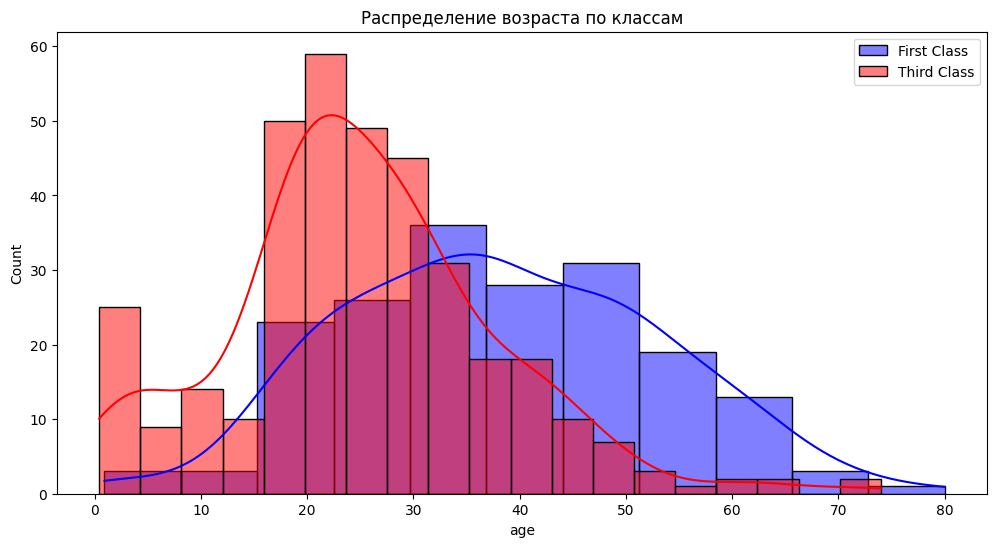

In [7]:
import seaborn as sns
from scipy.stats import shapiro, levene
import matplotlib.pyplot as plt

# Загрузка данных
titanic = sns.load_dataset('titanic')
class1 = titanic[titanic['class'] == 'First']
class3 = titanic[titanic['class'] == 'Third']

age_first = class1['age'].dropna()
age_third = class3['age'].dropna()

# Тест Шапиро-Уилка (проверка нормальности)
stat_first, p_first = shapiro(age_first)
stat_third, p_third = shapiro(age_third)

# Тест Левена (проверка гомогенности дисперсий)
stat_lev, p_lev = levene(age_first, age_third)

print(f"Shapiro test (First Class): p={p_first:.4f}")
print(f"Shapiro test (Third Class): p={p_third:.4f}")
print(f"Levene test for age: p={p_lev:.4f}")

# Визуализация
plt.figure(figsize=(12,6))
sns.histplot(class1['age'].dropna(), kde=True, color='blue', label='First Class')
sns.histplot(class3['age'].dropna(), kde=True, color='red', label='Third Class')
plt.title('Распределение возраста по классам')
plt.legend()
plt.show()

### Выводы
1. **Нормальность возраста:**  
   - Первый класс: нет оснований отвергать гипотезу о нормальном распределении  
   - Третий класс: распределение не является нормальным   
2. **Гомогенность дисперсий возраста:**  
   - дисперсии статистически значимо различаются

**Рекомендации:**  
- Поскольку возраст в третьем классе не нормален, целесообразно использовать непараметрические методы (например, тест Манна–Уитни) для сравнения возрастов между классами
- Для анализа пропорций (например, выживаемости) можно применять Z-тест для пропорций или $\chi^2$-тест

### 2. Проверить гипотезу о том, что пассажиры 1-го класса имели более высокую выживаемость, чем 3-го класса:
    - Проверить условия применимости тестов: Z-тест для пропорций и хи-квадрат тест
    - Провести Z-тест для пропорций
    - Провести хи-квадрат тест
    - Сравнить результаты и объяснить различия

Z-test p-value: 0.0000000000
Chi-square test p-value: 0.0000000000
Разница p-values: 0.0000000000


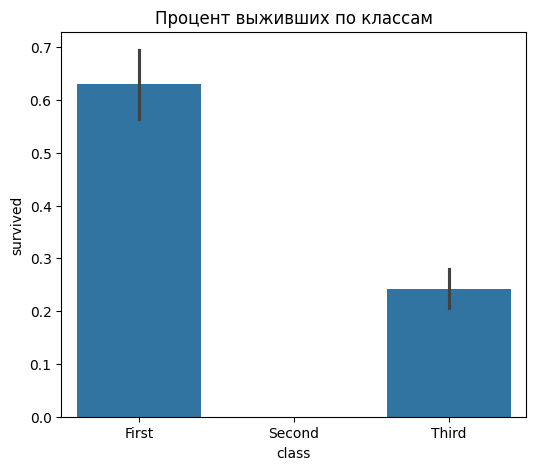

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm, chi2_contingency

# Загрузка данных
titanic = sns.load_dataset('titanic')
class1 = titanic[titanic['class'] == 'First']
class3 = titanic[titanic['class'] == 'Third']

# Подготовка данных
n_first = class1['survived'].count()
surv_first = class1['survived'].sum()
n_third = class3['survived'].count()
surv_third = class3['survived'].sum()

# Z-тест для пропорций
p_first = surv_first / n_first
p_third = surv_third / n_third
p_pool = (surv_first + surv_third) / (n_first + n_third)
se = math.sqrt(p_pool * (1 - p_pool) * (1/n_first + 1/n_third))
z_stat = (p_first - p_third) / se
p_val_z = 2 * (1 - norm.cdf(abs(z_stat)))

# Хи-квадрат тест
table = np.array([
    [surv_first, n_first - surv_first],
    [surv_third, n_third - surv_third]
])
chi2, p_val_chi2, dof, expected = chi2_contingency(table)

# Сравнение p-values
diff = abs(p_val_z - p_val_chi2)

print(f"Z-test p-value: {p_val_z:.10f}")
print(f"Chi-square test p-value: {p_val_chi2:.10f}")
print(f"Разница p-values: {diff:.10f}")

# Визуализация выживаемости (убираем Second Class)
plt.figure(figsize=(6,5))
df_filtered = titanic[titanic['class'].isin(['First','Third'])]
sns.barplot(data=df_filtered, x='class', y='survived')
plt.title('Процент выживших по классам')
plt.show()

### Выводы
**Данные:**  
- 1-й класс: 216 пассажиров, 136 выживших (63%)  
- 3-й класс: 487 пассажиров, 119 выживших (24%)  

**1. Z-тест для пропорций:**  
Формула:  
$$ Z = \frac{p_1 - p_3}{\sqrt{p(1-p)(\frac{1}{n_1} + \frac{1}{n_3})}} $$  
где $p = \frac{x_1 + x_3}{n_1 + n_3} = \frac{136+119}{216+487} ≈ 0.325$  

**2. Хи-квадрат тест:**  
Проверяет независимость класса и выживаемости:  
$$ \chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}} $$

**Результаты:**  
- Z-test p-value: 0.000000  
- Chi-square p-value: 0.000000  

**Объяснение различий:**  
- В 2×2 таблице $(\chi^2$-тест и Z-тест для пропорций) результаты математически связаны $(\chi^2 \approx Z^2$), поэтому p-value очень малы и практически совпадают
- Хи-квадрат тест оценивает общее отклонение наблюдаемых частот от ожидаемых, не показывая направления эффекта
- Z-тест даёт понимание, в какую сторону и насколько различаются пропорции
- Оба теста подтверждают, что выживаемость пассажиров 1-го класса существенно выше, чем в 3-м классе, и эта разница не случайна (p-value < 0.05)